Let's start by importing the antivax and #Covid19 data

In [1]:
import math
import numpy as np
import pandas as pd
import pycountry
import seaborn as sns
from matplotlib import pyplot as plt

from DataMadness import dataMergeClean
from DataMadness2 import dataMergeClean2

users = dataMergeClean()
usersCovid = dataMergeClean2("COVID19")

users=pd.DataFrame(users)
usersCovid=pd.DataFrame(usersCovid)

Plot of the account creation dates

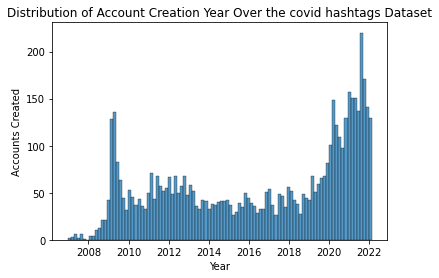

In [6]:
users.columns.values[6] = "followingCount"


sns.histplot(users["created"], bins=100)
plt.title("Distribution of Account Creation Year Over the covid hashtags Dataset")
plt.xlabel("Year")
# plt.xlim(date(2008,1,1),date(2010, 1, 1))
plt.ylabel("Accounts Created")

plt.show()

Plotting the follower counts

followersCount description
count    5.643000e+03
mean     4.635698e+03
std      8.030270e+04
min      0.000000e+00
25%      9.500000e+01
50%      3.470000e+02
75%      1.157000e+03
max      3.244240e+06
Name: followersCount, dtype: float64


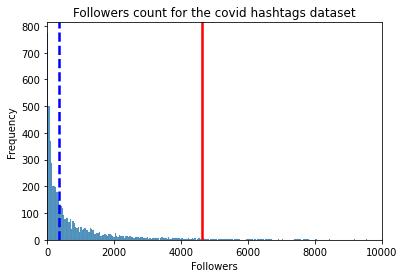

In [7]:
print("followersCount description")
print(users["followersCount"].describe())

userFollowers = users[users["followersCount"] < 40000]["followersCount"]  # remove outliers

sns.histplot(userFollowers, bins=1000)
plt.title("Followers count for the covid hashtags dataset")
plt.xlabel("Followers")
plt.ylabel("Frequency")
plt.xlim(0,10000)
plt.axvline(x=users["followersCount"].median(), color='blue', ls='--', lw=2.5)
plt.axvline(x=users["followersCount"].mean(), color='red', lw=2.5)
plt.show()

Twitter users' statuses posted

statusesCount description
count    5.643000e+03
mean     2.271161e+04
std      7.562502e+04
min      1.000000e+00
25%      1.850000e+03
50%      6.039000e+03
75%      1.863650e+04
max      2.608850e+06
Name: statusesCount, dtype: float64


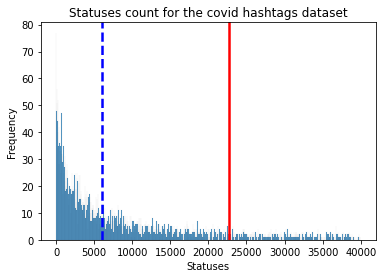

In [11]:
print("statusesCount description")
print(users["statusesCount"].describe())

userStatuses = users[users["statusesCount"] < 40000]["statusesCount"]  # remove outliers

sns.histplot(userStatuses, bins=1000)
plt.title("Statuses count for the covid hashtags dataset")
plt.xlabel("Statuses")
# plt.xlim(0,5000)
plt.ylabel("Frequency")
plt.axvline(x=users["statusesCount"].median(), color='blue', ls='--', lw=2.5)
plt.axvline(x=users["statusesCount"].mean(), color='red', lw=2.5)
plt.show()

Let's now look at the location info for the datasets
These take several minutes to fuzzy match locations to countries

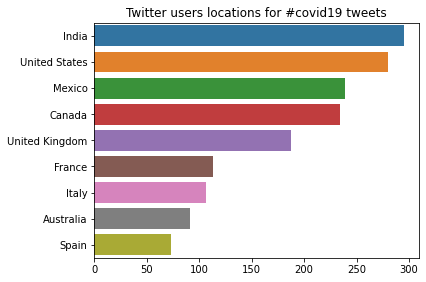

In [24]:
def parseLocation(location):
    country = location
    if "united states" in location.lower() or location.lower()=="usa" or location.lower()=="us":
        return "United States"
    if location != "":
        try:
            place = location.split(",")[-1]
            country = pycountry.countries.search_fuzzy(place)[0].name
        except:
            country = location
    return country

usersCovid['location'] = usersCovid['location'].apply(lambda x: parseLocation(x))

locations = usersCovid["location"].value_counts()[1:10]
ax = sns.barplot(y=locations.index, x=locations.values)
plt.title("Twitter users locations for #covid19 tweets")
plt.tight_layout(pad=1)
plt.show()

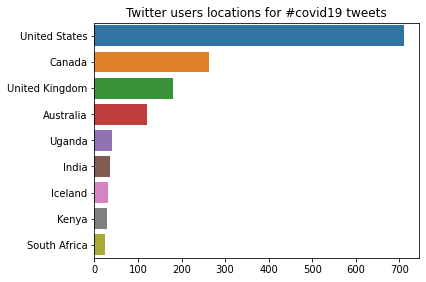

In [25]:
users['location'] = users['location'].apply(parseLocation)

locations = users["location"].value_counts()[1:10]
ax = sns.barplot(y=locations.index, x=locations.values)
plt.title("Twitter users locations for #covid19 tweets")
plt.tight_layout(pad=1)
plt.show()

Plotting followers count of antivax vs generic covid19

id
1491647986123911168    1.204120
1397779652949643271    2.413300
1385002277736521731    2.416641
979707807111921664     3.309843
331786486              2.298853
                         ...   
1430033430834814976    2.625312
1387196275402018817    2.424882
462464578              3.507721
2944593299             2.572872
326142866              3.905796
Name: followersCount, Length: 5643, dtype: float64


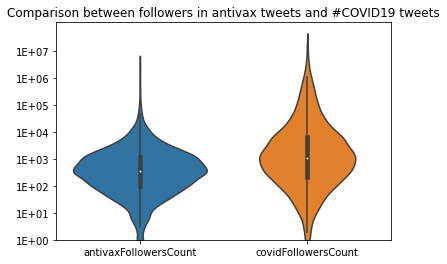

In [26]:
users["followersCount"] = users["followersCount"].apply(lambda x: math.log10(x + 1))
usersCovid["followersCount"] = usersCovid["followersCount"].apply(lambda x: math.log10(x + 1))

print(users["followersCount"])

antivaxFollowersCount = pd.DataFrame(users["followersCount"].rename("antivaxFollowersCount")).reset_index(drop=True)
covidFollowersCount = pd.DataFrame(usersCovid["followersCount"].rename("covidFollowersCount")).reset_index(drop=True)
antivaxFollowersCount = antivaxFollowersCount.join(covidFollowersCount, how="outer")

ax = sns.violinplot(data=antivaxFollowersCount, showmedians=True)

# ax = sns.boxplot(data=covidFollowersCount)
# plt.yscale('symlog')
plt.yticks(np.arange(0, 8), [format(x, '.0E') for x in 10 ** np.arange(0, 8)])
ax.set_ylim(bottom=0)
plt.title('Comparison between followers in antivax tweets and #COVID19 tweets')
plt.show()

Plotting creation date of antivax vs generic covid19

      antivaxCreated  covidCreated
0             2022.0          2020
1             2021.0          2013
2             2021.0          2020
3             2018.0          2011
4             2011.0          2010
...              ...           ...
6418             NaN          2010
6419             NaN          2009
6420             NaN          2019
6421             NaN          2020
6422             NaN          2010

[6423 rows x 2 columns]


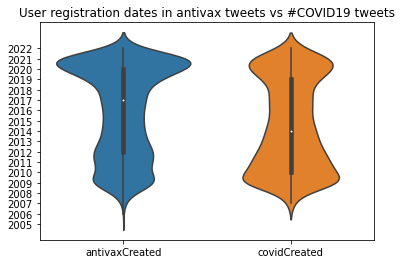

In [27]:
antivaxRegistrationDate = pd.DataFrame(
    users["created"].apply(lambda x: int(x.strftime('%Y'))).rename("antivaxCreated")).reset_index(drop=True)
covidRegistrationDate = pd.DataFrame(
    usersCovid["created"].apply(lambda x: int(x.strftime('%Y'))).rename("covidCreated")).reset_index(drop=True)
comparisonRegistrationDate = antivaxRegistrationDate.join(covidRegistrationDate, how="outer")

print(comparisonRegistrationDate)

ax = sns.violinplot(data=comparisonRegistrationDate, showmedians=True)
plt.yticks(np.arange(2005, 2023))

# ax = sns.boxplot(data=covidFollowersCount)
plt.title('User registration dates in antivax tweets vs #COVID19 tweets')
plt.show()

Plotting posted statuses count of antivax vs generic covid19

id
1491647986123911168    2.770115
1397779652949643271    3.437751
1385002277736521731    3.608847
979707807111921664     3.930185
331786486              4.357649
                         ...   
1430033430834814976    3.914660
1387196275402018817    3.569725
462464578              3.848559
2944593299             3.944038
326142866              5.047170
Name: statusesCount, Length: 5643, dtype: float64


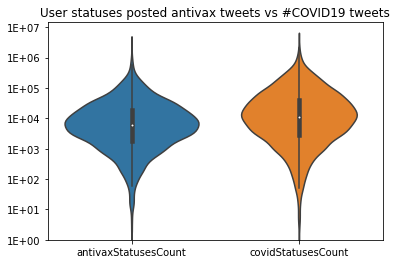

In [28]:
users["statusesCount"] = users["statusesCount"].apply(lambda x: math.log10(x + 1))
usersCovid["statusesCount"] = usersCovid["statusesCount"].apply(lambda x: math.log10(x + 1))

print(users["statusesCount"])

antivaxStatusesCount = pd.DataFrame(users["statusesCount"].rename("antivaxStatusesCount")).reset_index(drop=True)
covidStatusesCount = pd.DataFrame(usersCovid["statusesCount"].rename("covidStatusesCount")).reset_index(drop=True)
antivaxStatusesCount = antivaxStatusesCount.join(covidStatusesCount, how="outer")

ax = sns.violinplot(data=antivaxStatusesCount, showmedians=True)

# ax = sns.boxplot(data=covidStatusesCount)
# plt.yscale('symlog')
plt.yticks(np.arange(0, 8), [format(x, '.0E') for x in 10 ** np.arange(0, 8)])
ax.set_ylim(bottom=0)
plt.title('User statuses posted antivax tweets vs #COVID19 tweets')
plt.show()